In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

### Taj Mahal

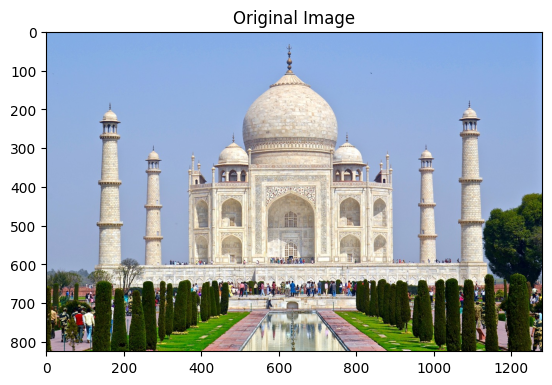

In [2]:
image = cv2.imread("Images/tajMahal.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.title("Original Image")
plt.imshow(image)
plt.show()

#### Uniform Noise

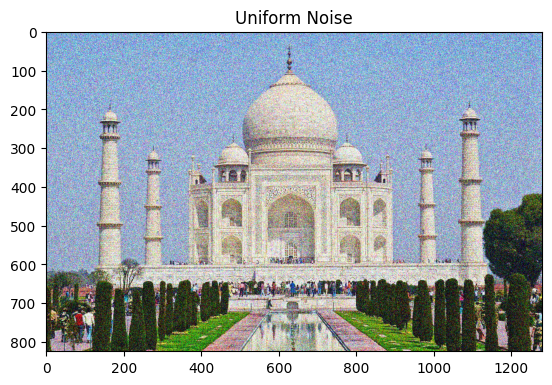

In [3]:
def uniform_noise(image, intensity):
    noise = np.random.uniform(low=-intensity, high=intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

uniform_image = uniform_noise(image, 100)

plt.title("Uniform Noise")
plt.imshow(uniform_image)
plt.show()

#### Gaussian Noise

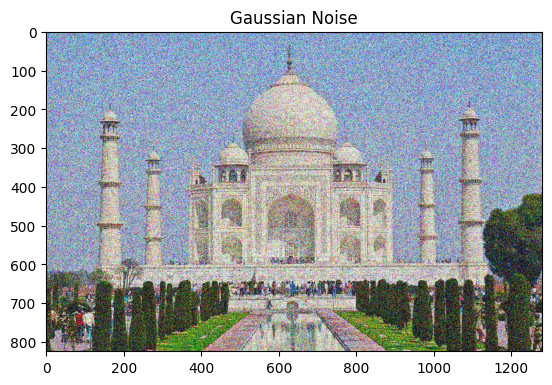

In [4]:
def gaussian_noise(image, intensity):
    noise = np.random.normal(0, intensity, size=image.shape)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)
    return noisy_image

gaussian_image = gaussian_noise(image, 100)

plt.title("Gaussian Noise")
plt.imshow(gaussian_image)
plt.show()

#### Salt & Pepper Noise

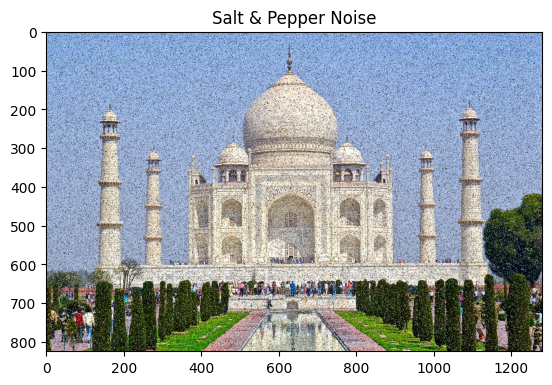

In [5]:
def salt_and_pepper_noise(image, prob):
    noisy_image = np.copy(image)
    salt = np.random.rand(*image.shape[:2]) < prob
    pepper = np.random.rand(*image.shape[:2]) < prob
    noisy_image[salt] = 255
    noisy_image[pepper] = 0
    return noisy_image

# gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

salt_and_pepper_image = salt_and_pepper_noise(image, 0.069)

plt.title("Salt & Pepper Noise")
plt.imshow(salt_and_pepper_image, cmap="gray")
plt.show()

#### Gaussian Smoothing

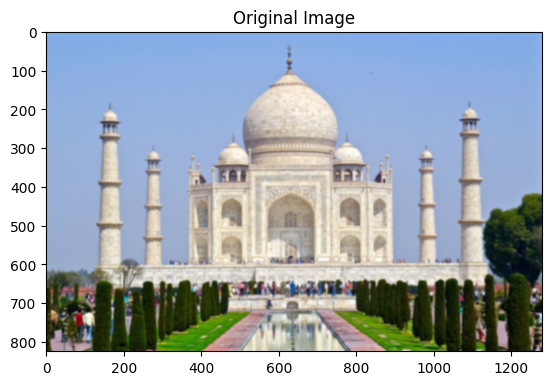

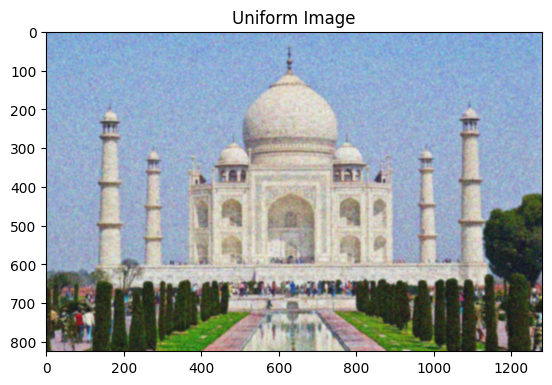

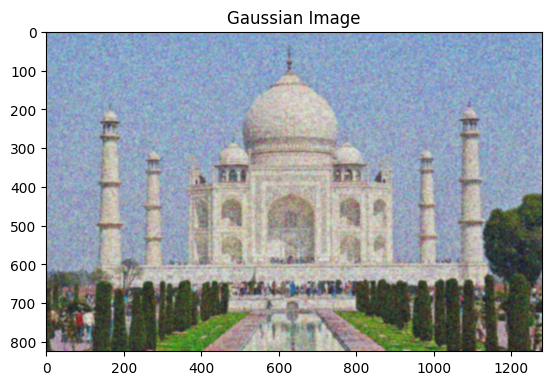

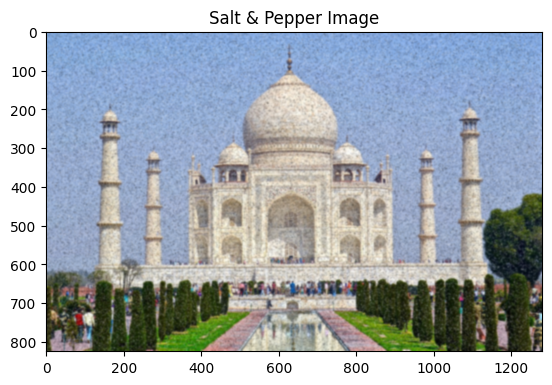

In [6]:
def gaussian_smoothing(image):
    return cv2.GaussianBlur(image, (11, 11), 0)

title = ["Original Image", "Uniform Image", "Gaussian Image", "Salt & Pepper Image"]

for idx, img in enumerate([image, uniform_image, gaussian_image, salt_and_pepper_image]):
    img = gaussian_smoothing(img)
    plt.title(title[idx])
    plt.imshow(img)
    plt.show()

### Night Vision Image

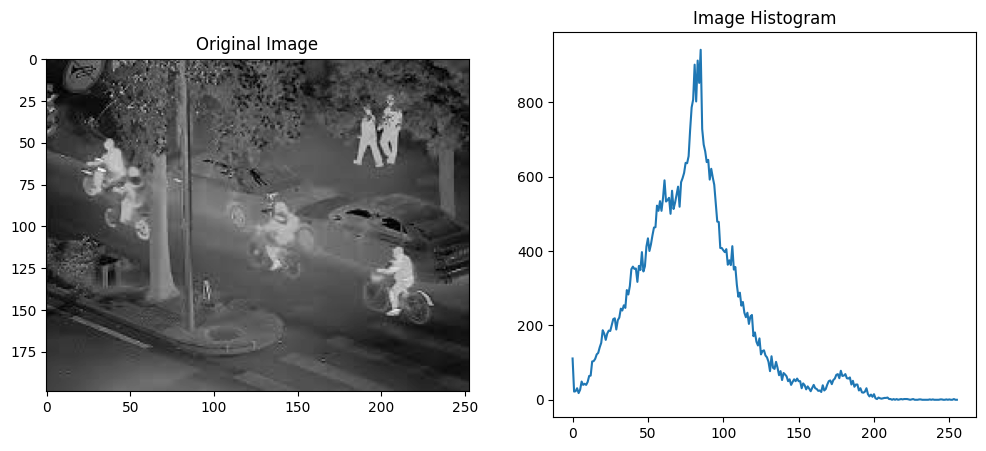

In [7]:
image = cv2.imread("Images/NightVision.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()

#### Contrast Stretching

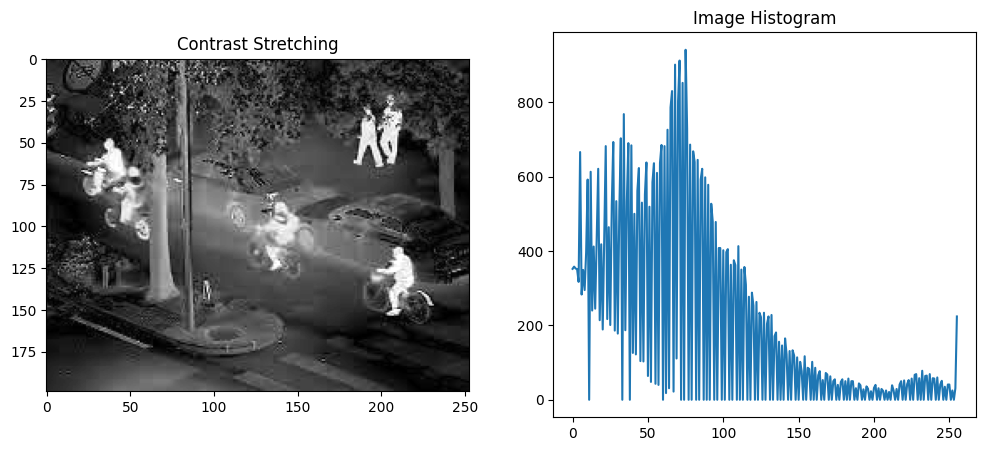

In [8]:
contrast_stretching = cv2.convertScaleAbs(image, alpha=1.69, beta=-69)

hist = cv2.calcHist([contrast_stretching], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Contrast Stretching")
plt.imshow(contrast_stretching, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()

#### Histogram Equalization

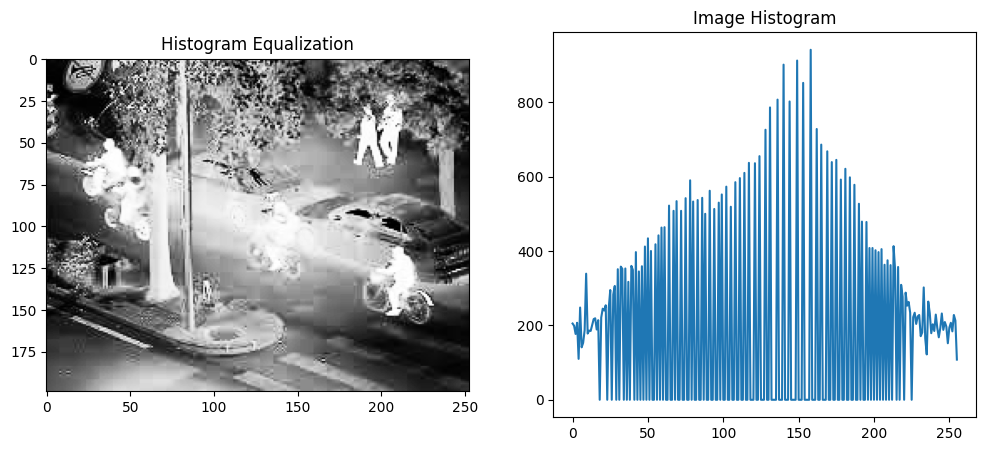

In [9]:
equal_hist = cv2.equalizeHist(image)

hist = cv2.calcHist([equal_hist], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Histogram Equalization")
plt.imshow(equal_hist, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()

### Histogram Matching

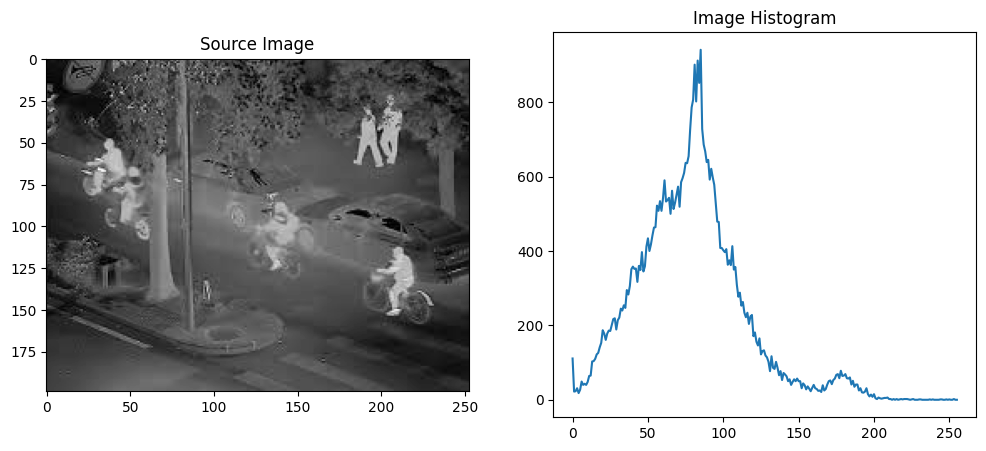

In [10]:
image = cv2.imread("Images/NightVision.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Source Image")
plt.imshow(image, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()

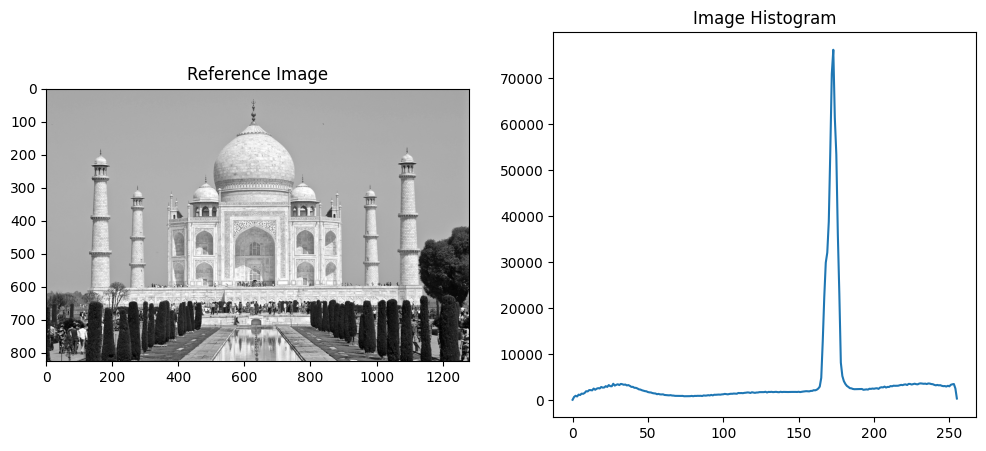

In [11]:
reference = cv2.imread("Images/tajMahal.jpg")
reference = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([reference], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Reference Image")
plt.imshow(reference, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()

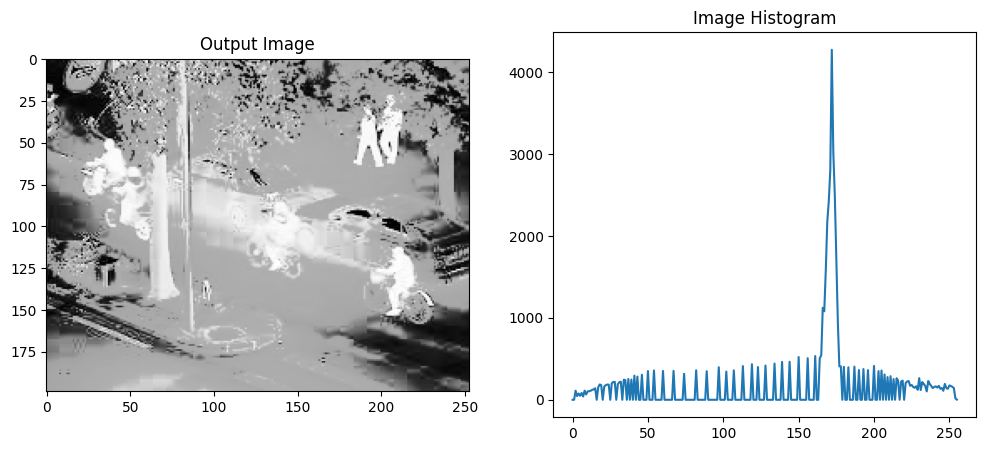

In [12]:
from skimage.exposure import match_histograms

matched = match_histograms(image, reference).astype(np.uint8)

hist = cv2.calcHist([matched], [0], None, [256], [0, 256])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Output Image")
plt.imshow(matched, cmap="gray")

plt.subplot(1, 2, 2)
plt.title("Image Histogram")
plt.plot(hist)

plt.show()